In [18]:
from DS_healpix_fragmentation import *
import numpy as np
import healpy as hp
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib import pyplot as plt
from DS_Planck_Unet import draw_pic
from DS_data_transformation import normalize
from DS_WCS_projections import custom_wcs, dist_from_center, draw_circles_w
import DS_Coma_Cluster_param as cc_prm

In [2]:
pix = 0
o_nside = 32
depth = 6
matr = one_pixel_fragmentation(o_nside, pix, depth)

In [3]:
def dist(matr):
    pix = np.array([matr[0,32], matr[32, 32]])
    theta, phi = hp.pix2ang(nside=o_nside*2**depth, nest=True, lonlat=True, ipix=pix)
    print(pix)
    print(theta, phi)
    sc0 = SkyCoord(l=theta[0]*u.degree, b=phi[0]*u.degree, frame='galactic')
    sc1 = SkyCoord(l=theta[1]*u.degree, b=phi[1]*u.degree, frame='galactic')
    return sc0.separation(sc1).degree

In [4]:
pich = draw_pic(matr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


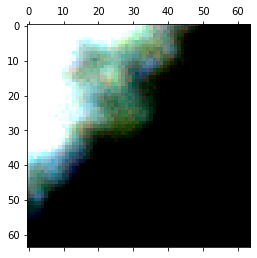

In [5]:
plt.matshow(normalize(pich[:,:,:3]))

In [6]:
cc_wcs = custom_wcs(cc_prm.ra_center, cc_prm.dec_center)

/home/rt2122/L/git/data-segmentation-2/modules/DS_WCS_projections.py:39: RuntimeWarning: cdelt will be ignored since cd is present
  w1.wcs.cdelt = w.wcs.cdelt[:2]


In [7]:
cc_wcs.array_shape= [64, 64]
cc_wcs.wcs.crpix = [32.5, 32.5]
cc_wcs.wcs.cd = np.array([[-0.0294,  0.    ],
       [ 0.    ,  0.0294]]) 

In [8]:
def draw_planck(wcs, dirname = '/home/rt2122/Data/Planck/normalized/', nside=2048):
    import os
    from DS_healpix_fragmentation import radec2pix
    
    files = sorted(next(os.walk(dirname))[-1])
    pic = np.zeros(list(wcs.array_shape) + [len(files)])
    
    for i_f, file in enumerate(files):
        i_s = np.load(os.path.join(dirname, file))
        
        for x in range(pic.shape[0]):
            ra, dec = wcs.all_pix2world(np.full(pic.shape[1], x), 
                                        np.arange(pic.shape[1]), 0)
            pix = radec2pix(ra, dec, nside=nside)
            pic[x, :, i_f] = i_s[pix]
    return pic


In [9]:
pic = draw_planck(cc_wcs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


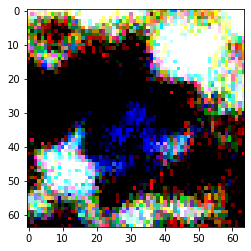

In [10]:
plt.imshow(normalize(pic[:,:,:3]))

/home/rt2122/L/git/data-segmentation-2/modules/DS_data_transformation.py:83: RuntimeWarning: invalid value encountered in true_divide
  pic[:,:,i] /= np.std(pic[:,:,i])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


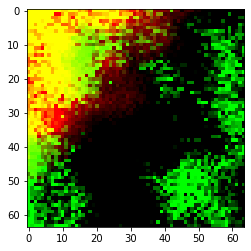

In [11]:
plt.imshow(normalize(np.dstack([pich[:,:,:1], 
                                np.rot90(pic[:,:,:1]), np.zeros((64, 64, 1))])))

In [12]:
obj = np.array(cc_prm.obj).T

In [13]:
mdict = matr2dict(matr)

In [16]:
circles_h = draw_circles_h(ra, dec, np.ones(3), 2048, mdict, (64, 64, 1))

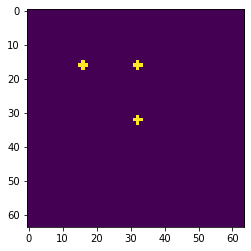

In [17]:
plt.imshow(circles_h[:,:,0])

In [14]:
pix = matr[32, 32], matr[16, 32], matr[16, 16]
pix

(3072, 1536, 768)

In [15]:
ra, dec = pix2radec(pix, 2048)

In [19]:
circles_w = draw_circles_w(ra, dec, np.ones(3), cc_wcs, (64, 64, 1))

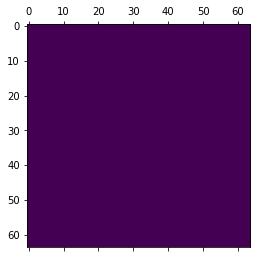

In [20]:
plt.matshow(circles_w[:,:,0])

In [ ]:
#нарисовать ненайденные скопления
#модель на (None, None, None, 6)